In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:\\Users\\HP\\Downloads\\Titanic-Dataset.csv")

In [4]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Summary statistics for all columns
summary = df.describe(include='all')
print(summary)


        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN                  891     2   
top             NaN         NaN         NaN  Dooley, Mr. Patrick  male   
freq            NaN         NaN         NaN                    1   577   
mean     446.000000    0.383838    2.308642                  NaN   NaN   
std      257.353842    0.486592    0.836071                  NaN   NaN   
min        1.000000    0.000000    1.000000                  NaN   NaN   
25%      223.500000    0.000000    2.000000                  NaN   NaN   
50%      446.000000    0.000000    3.000000                  NaN   NaN   
75%      668.500000    1.000000    3.000000                  NaN   NaN   
max      891.000000    1.000000    3.000000                  NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare Cabin Embarked  
count   714.000000  891.000000 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numeric Columns:", numeric_cols.tolist())


Numeric Columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


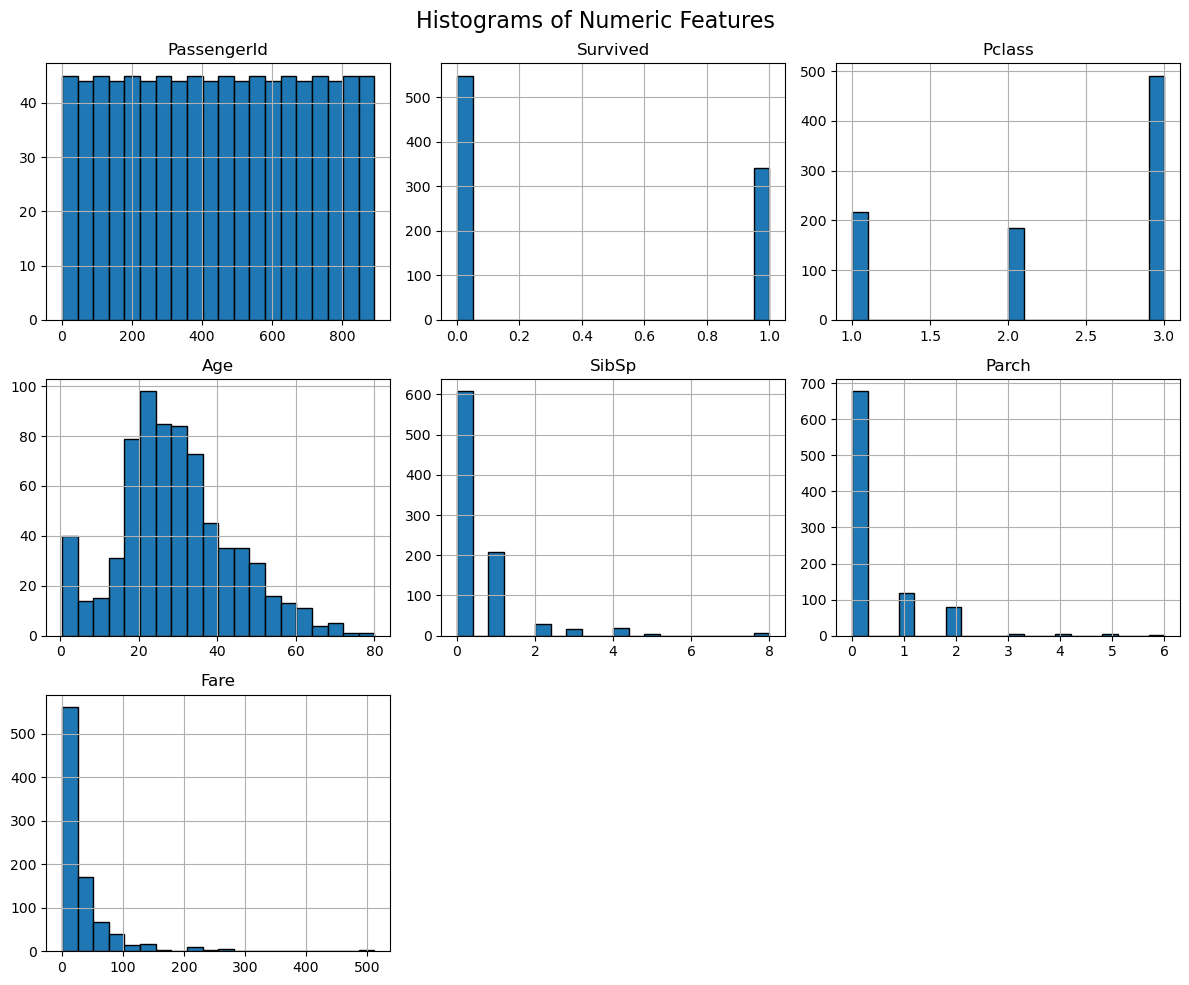

In [8]:
# Plot histograms
df[numeric_cols].hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()


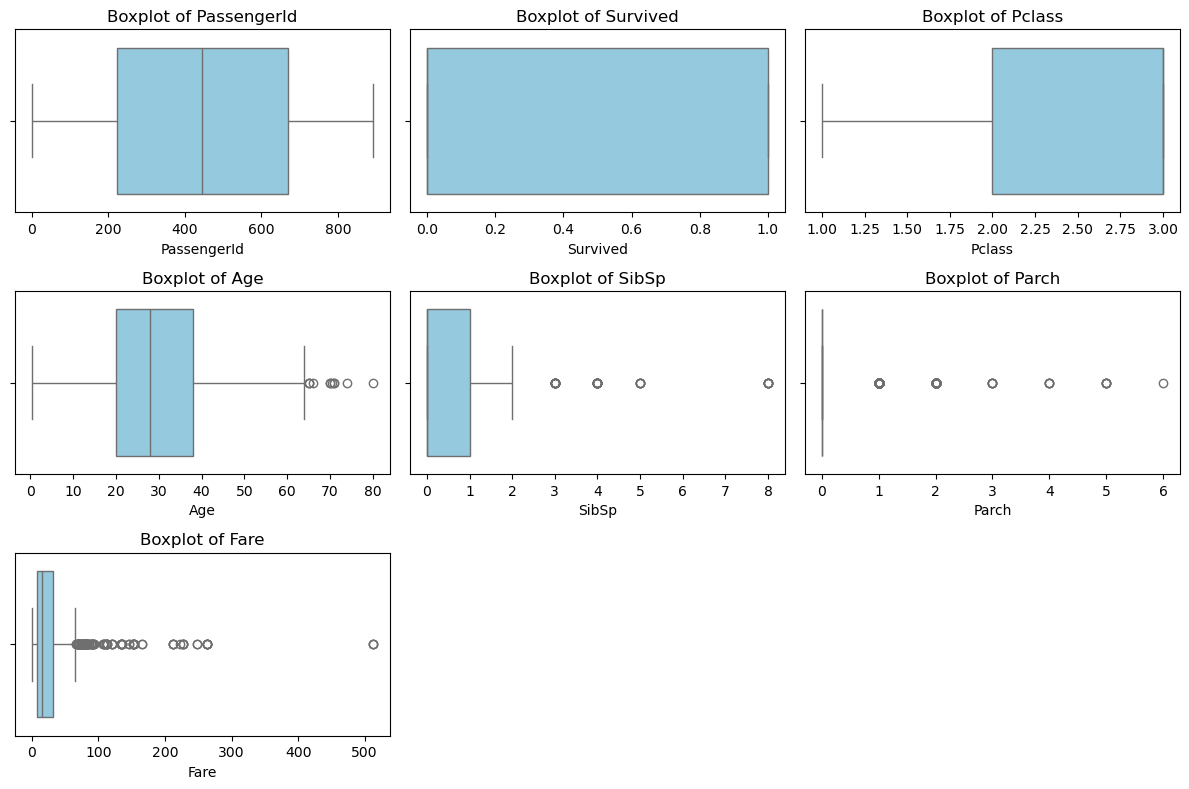

In [9]:
# Plot boxplots
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


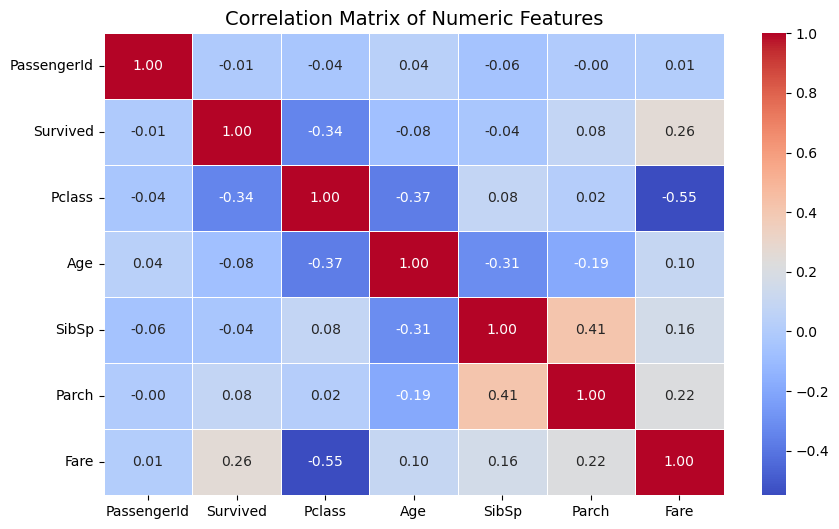

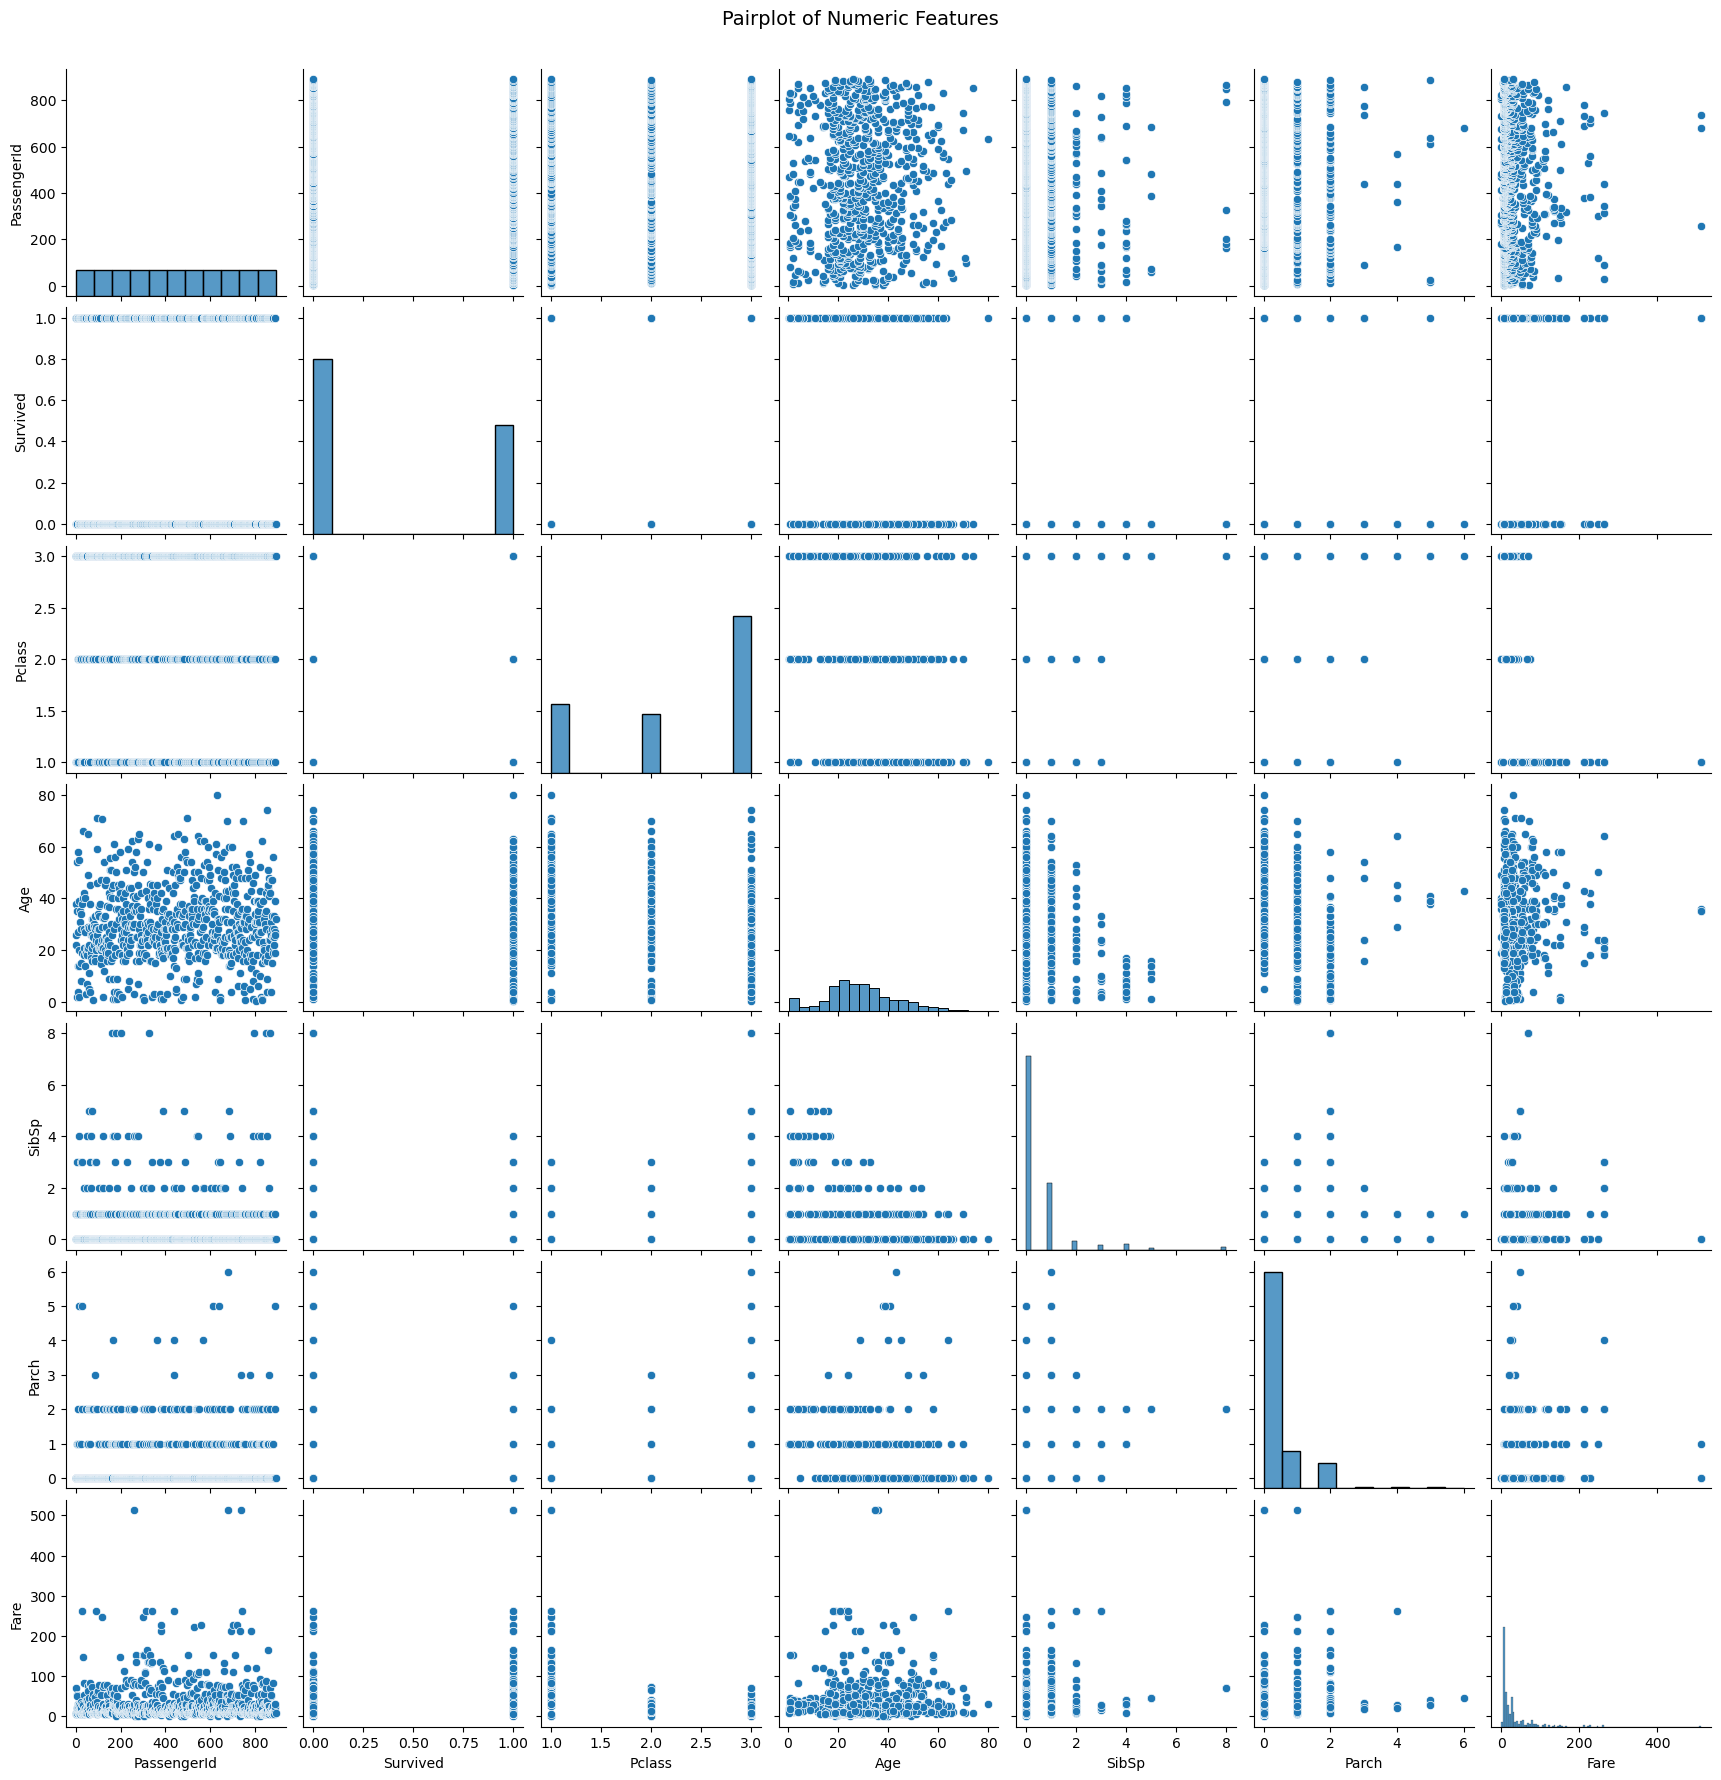

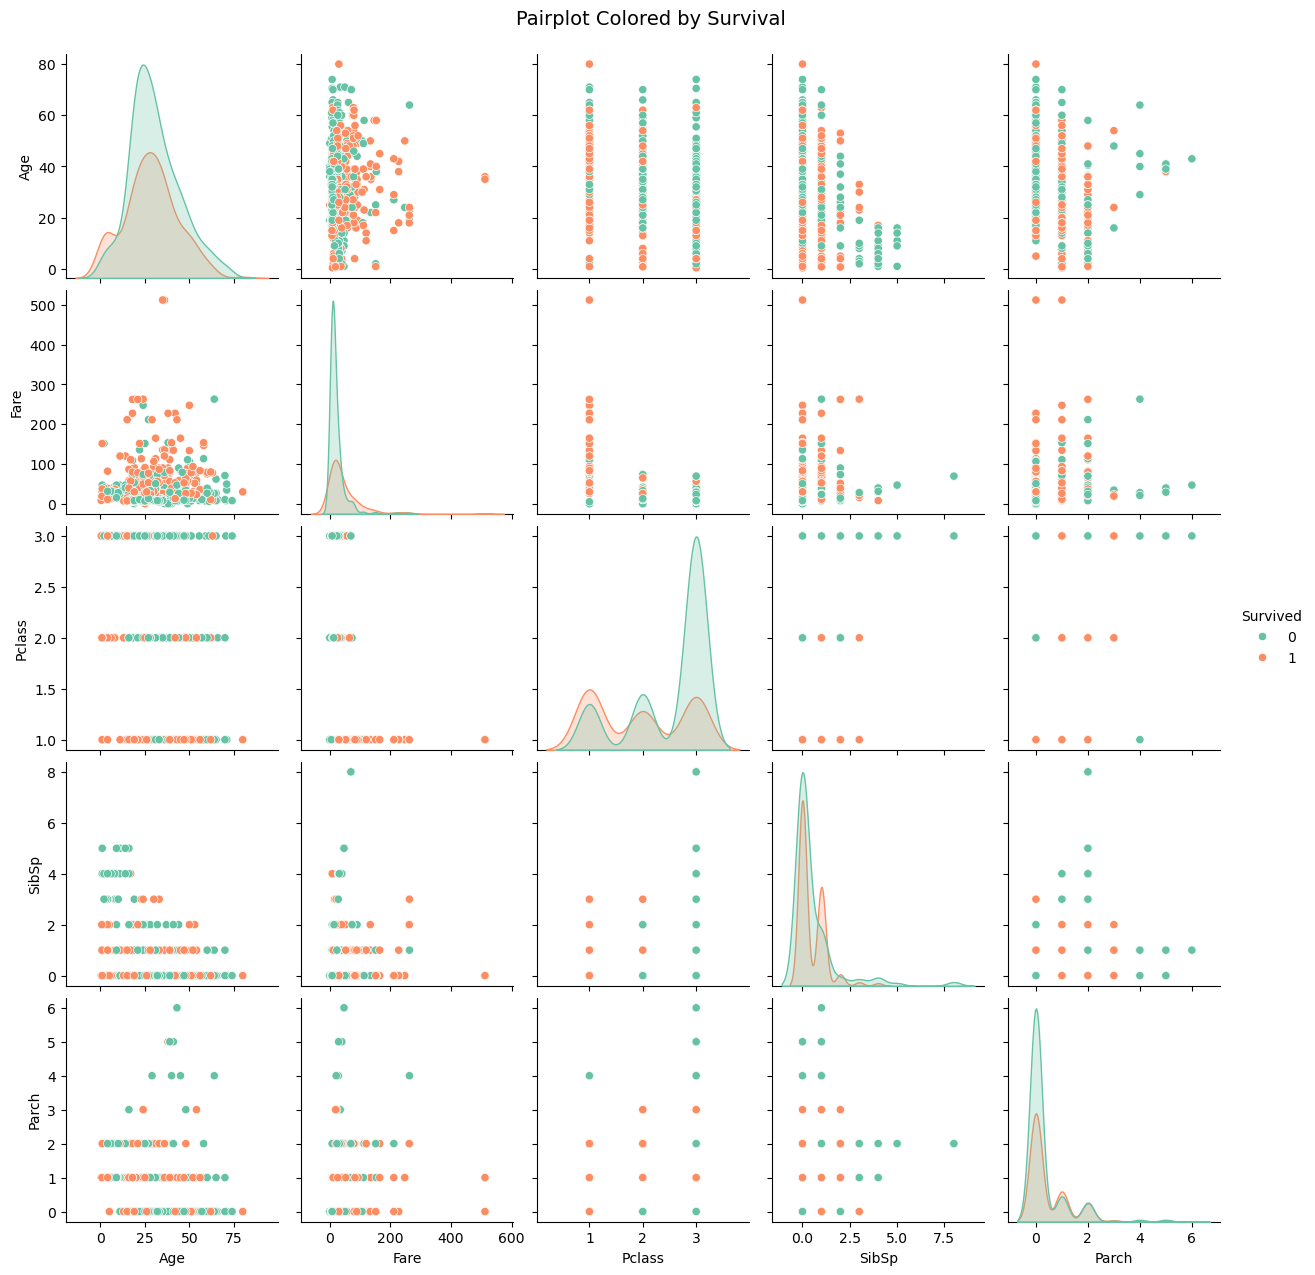

In [10]:
#
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features", fontsize=14)
plt.show()


#  Pairplot (visual relationship)

sns.pairplot(numeric_cols)
plt.suptitle("Pairplot of Numeric Features", y=1.02, fontsize=14)
plt.show()


# (Optional) Pairplot by Survival

sns.pairplot(df, vars=['Age', 'Fare', 'Pclass', 'SibSp', 'Parch'], hue='Survived', palette='Set2')
plt.suptitle("Pairplot Colored by Survival", y=1.02, fontsize=14)
plt.show()


In [11]:
from scipy import stats#anomalies for int
import numpy as np

z = np.abs(stats.zscore(df['Parch']))
outliers = np.where(z > 3)
outliers

(array([ 13,  25,  86, 167, 360, 437, 438, 567, 610, 638, 678, 736, 774,
        858, 885]),)

In [14]:
print(df['Parch'][435])

2


In [19]:
print(df['Parch'][13])

5


In [25]:
#ther is no categirical data because all are unique
cat_cols = ['Sex', 'Cabin', 'Embarked', 'Ticket']  # categorical columns

for col in cat_cols:
    freq = df[col].value_counts(normalize=True, dropna=False)
    rare = freq[freq < 0.01].index
    print(f"\n--- Rare categories in {col} ---")
    print(rare)



--- Rare categories in Sex ---
Index([], dtype='object', name='Sex')

--- Rare categories in Cabin ---
Index(['G6', 'C23 C25 C27', 'B96 B98', 'F2', 'D', 'E101', 'C22 C26', 'F33',
       'C83', 'C123',
       ...
       'B102', 'B69', 'E49', 'C47', 'D28', 'E17', 'A24', 'C50', 'B42', 'C148'],
      dtype='object', name='Cabin', length=147)

--- Rare categories in Embarked ---
Index([nan], dtype='object', name='Embarked')

--- Rare categories in Ticket ---
Index(['347082', '1601', 'CA. 2343', '3101295', 'CA 2144', '347088', '382652',
       'S.O.C. 14879', '113781', '347077',
       ...
       '349212', '349217', '349257', '7552', 'C.A./SOTON 34068',
       'SOTON/OQ 392076', '211536', '112053', '111369', '392091'],
      dtype='object', name='Ticket', length=681)


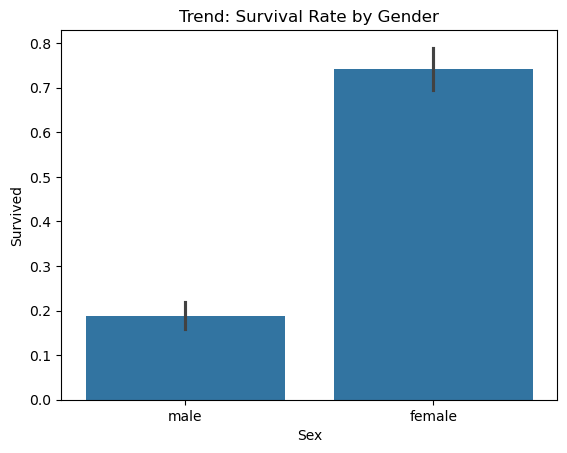

In [32]:
#patterns in categorical data
#Survival rate by gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Trend: Survival Rate by Gender")
plt.show()



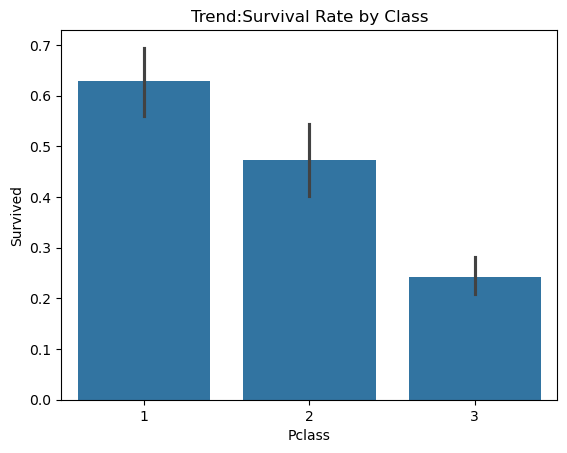

In [33]:
#Survival rate by passenger class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Trend:Survival Rate by Class")
plt.show()


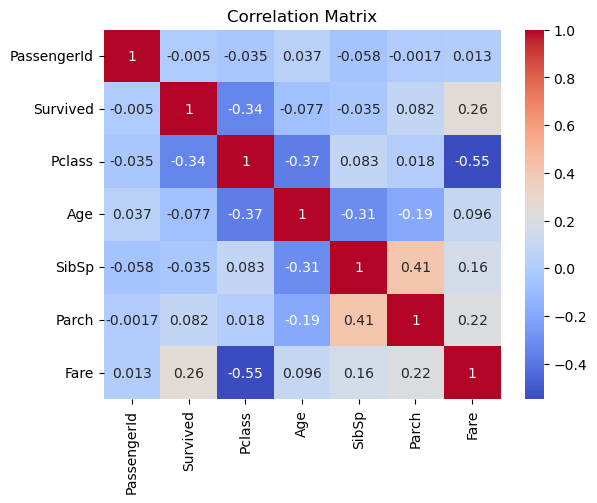

In [29]:
#patterns in numerica data
#Correlation matrix
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()



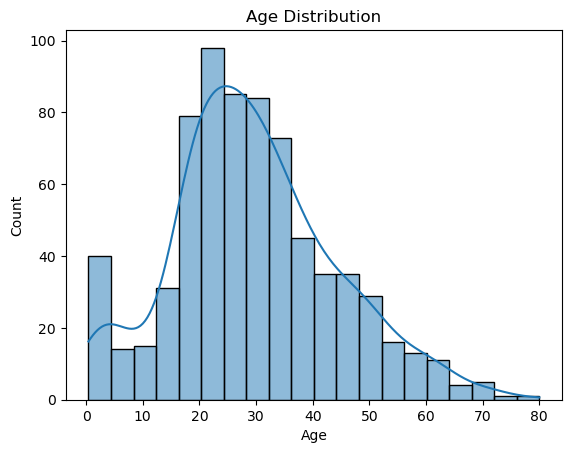

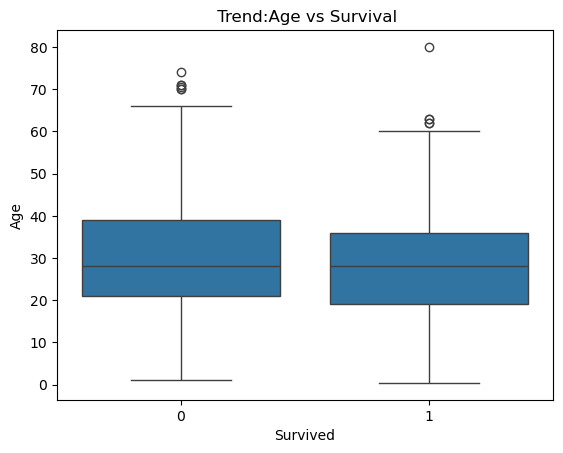

In [34]:
#Survival by age
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

sns.boxplot(x='Survived', y='Age', data=df)
plt.title(" Trend:Age vs Survival")
plt.show()


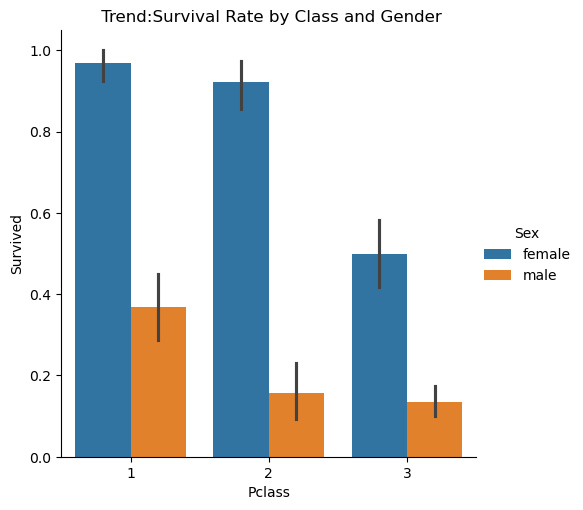

In [35]:
#Survival by class and gender
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df, kind='bar')
plt.title(" Trend:Survival Rate by Class and Gender")
plt.show()


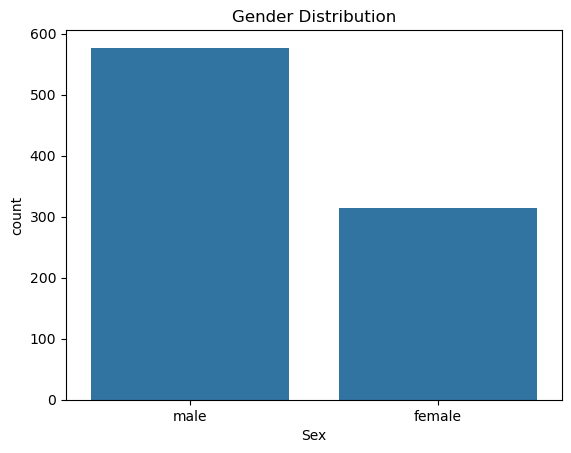

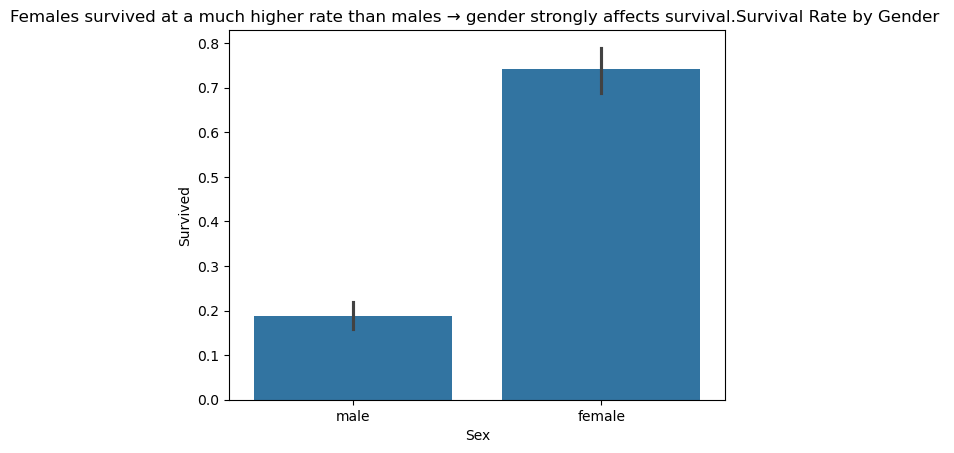

In [38]:
sns.countplot(x='Sex', data=df)
plt.title("Gender Distribution")
plt.show()

sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Inference:There are more males than females on board.")
plt.title("Females survived at a much higher rate than males → gender strongly affects survival.Survival Rate by Gender ")
plt.show()


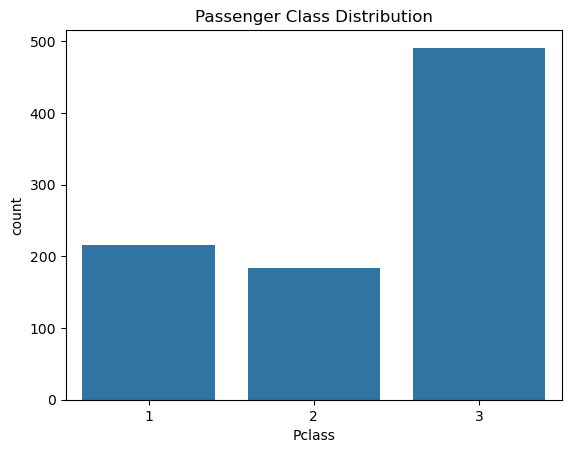

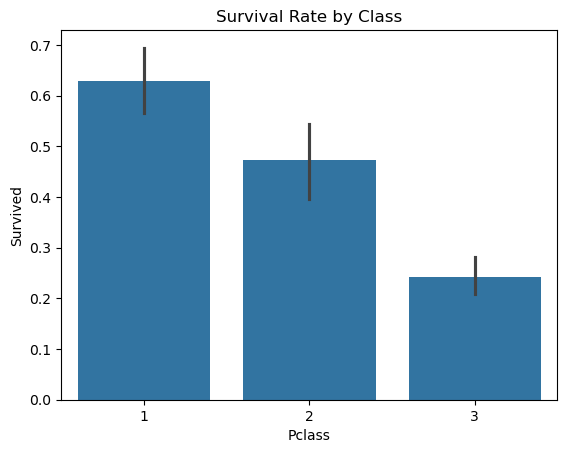

In [39]:
sns.countplot(x='Pclass', data=df)
plt.title("Passenger Class Distribution")
plt.show()

sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Class")
plt.show()


In [40]:
#Inference:

#Most passengers were in 3rd class.

#1st class passengers survived the most, 3rd class the least → higher social status gave better chance of survival.